# Course Project #1

### Ground rule
My data needs to be processed all the necessary steps to be considered **clean and ready for further analysis**.

You are expected to leverage a wide variety of tools, but these report should focus on present **findings, insights, and next steps**.  
You may includes some visuals from your code output, but this report is intended as **a summary of your findings**, not as a code review.  
Optionally, you can submit your code as a python notebook or as a print out in the appendix of your document.

### Required
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

- Brief description of the data set and a summary of its attributes
- Initial plan for data exploration
- Actions taken for data cleaning and feature engineering
- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
- Formulating at least 3 hypothesis about this data
- Conducting a formal significance test for one of the hypotheses and discuss the results 
- Suggestions for next steps in analyzing this data
- A paragraph that summarizes the quality of this data set and a request for additional data if needed

## Check project materials as followings:

### Section#1 : Read Data

- Read Target Data from directory as python variable
- Check basic information(head, tail, info, shape ...)

### Section#2 : Data Cleaning
- Clean the data by removing, imputing, masking features/targets 
- Clean the data by properly processing outliers by removing, assigning, transforming, predicting techniques

### Section#3 : Exploratory Data Analysus
- Randomly sample from data 
- Visualize raw features ,features statistics, xy correlations using matplotlib, seaborn libraries

### Section#4 : Feature Engineering and Variable Transformation

### Section#5 : Hypothesis testing : Formulating 3 hypothesis
•	Formulating at least 3 hypothesis about this data
•	Conducting a formal significance test for one of the hypotheses and discuss the results 
### Future work




#### Packages used

 - [os] : os is used to run os commands.
 - [Pandas] : Pandas will be used to control imported data as dataframe format

### About data set
In this project I use **A dataset for heart attack classification** 
shared on kaggle(https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Data has **features/target** on columns as follows:

1.   age      : Age of the person  
2.   sex      : Gender of the person  
3.   cp       : Chest Pain type chest pain type  
4.   trtbps   : Resting blood pressure (in mm Hg)  
5.   chol     : Cholestoral in mg/dl fetched via BMI sensor  
6.   fbs      : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
7.   restecg  : resting electrocardiographic results  
8.   thalachh : maximum heart rate achieved  
9.   exng     : exercise induced angina (1 = yes; 0 = no)  
10.  oldpeak  : Previous peak  
11.  slp      : Slope  
12.  caa      : number of major vessels (0-3)  
13.  thall    : Thal rate  
14.  output   : Target variable(Heart attack flag)

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Check current working path to set valid file path in the next cell
cwd = os.getcwd()
print(cwd)

D:\Coursera\IBM_MachineLearning\2W_2_Project


In [11]:
filepath = 'heart.csv'
# Import Heart Attack Analysis & Prediction Dataset
data     = pd.read_csv(filepath)

In [17]:
# Print a few head rows
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Print a few tail rows
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
data.info() # Column Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [22]:
data.shape   # Check the sample and column size

(303, 14)

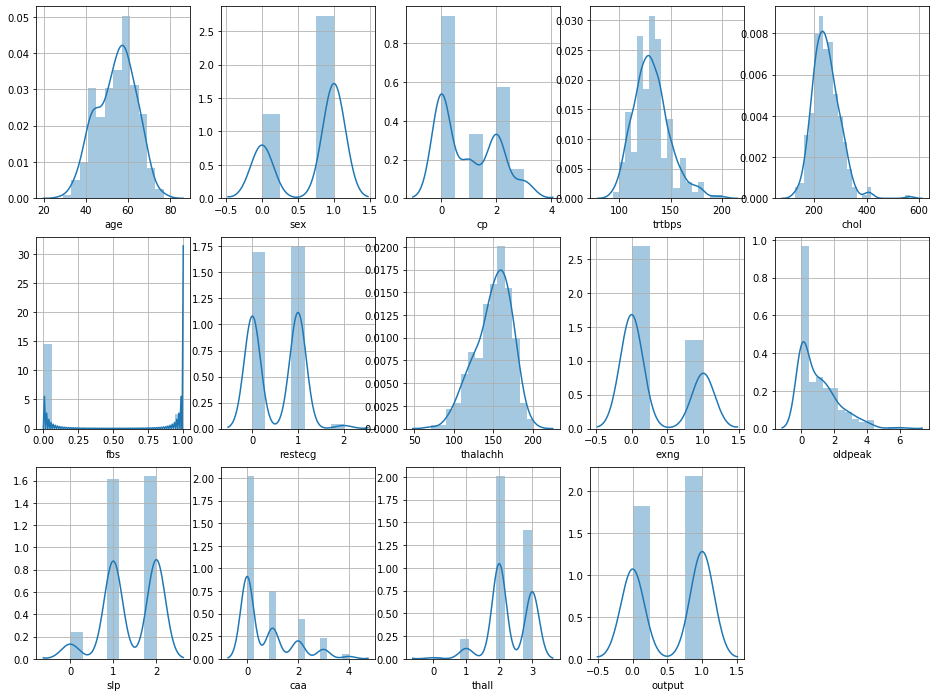

In [42]:
plt.figure(figsize=(16, 12))

for i, dt in enumerate(data):
    plt.subplot(3,5,i+1)
    sns.distplot(data[dt])
    plt.grid()

#### We ca|n get visibly abnormal samples of specific feature using 'sns.distplot'
##### First of all, feature 'chol' seems has abnormal values on the right side of distribution
##### Let's check detaield information using 'sns.boxplot'

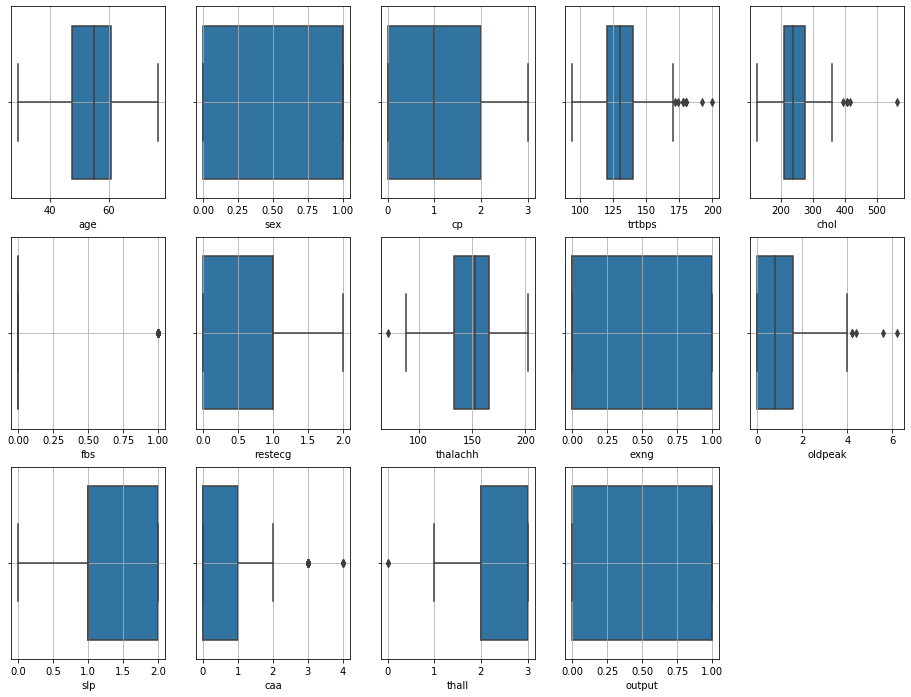

In [43]:
plt.figure(figsize=(16, 12))

for i, dt in enumerate(data):
    plt.subplot(3,5,i+1)
    sns.boxplot(data[dt])
    plt.grid()

In [50]:
data.iloc[np.where(data['chol']>500)[0][0]]

age          67.0
sex           0.0
cp            2.0
trtbps      115.0
chol        564.0
fbs           0.0
restecg       0.0
thalachh    160.0
exng          0.0
oldpeak       1.6
slp           1.0
caa           0.0
thall         3.0
output        1.0
Name: 85, dtype: float64